In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane", "automobile", "bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

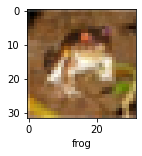

In [8]:
plot_sample(X_train, y_train, 0)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0


In [10]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 181s 115ms/step - loss: 1.8090 - accuracy: 0.3571
Epoch 2/5
1563/1563 [==============================] - 129s 82ms/step - loss: 1.6218 - accuracy: 0.4286
Epoch 3/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.5393 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4801 - accuracy: 0.4801
Epoch 5/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4306 - accuracy: 0.4960


In [11]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 9s 26ms/step - loss: 1.7042 - accuracy: 0.3898


[1.7041808366775513, 0.3898000121116638]

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print ("classification Report: \n", classification_report(y_test, y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.60      0.52      1000
           1       0.72      0.29      0.42      1000
           2       0.44      0.22      0.29      1000
           3       0.50      0.06      0.11      1000
           4       0.46      0.27      0.34      1000
           5       0.41      0.33      0.37      1000
           6       0.66      0.27      0.39      1000
           7       0.24      0.85      0.37      1000
           8       0.79      0.25      0.38      1000
           9       0.37      0.74      0.50      1000

    accuracy                           0.39     10000
   macro avg       0.50      0.39      0.37     10000
weighted avg       0.50      0.39      0.37     10000



In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters= 64, kernel_size=(3,3), activation ='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [14]:
cnn.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [16]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4236 - accuracy: 0.4880
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0684 - accuracy: 0.6226
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9203 - accuracy: 0.6799
Epoch 4/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8294 - accuracy: 0.7120
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7527 - accuracy: 0.7389
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6817 - accuracy: 0.7632
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6115 - accuracy: 0.7858
Epoch 8/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.5485 - accuracy: 0.8068
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.4925 - accuracy: 0.8271
Epoch 10/10
1563/1563 [==============================] - 68s 44m

In [17]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.1258 - accuracy: 0.6708


[1.1258257627487183, 0.670799970626831]

In [18]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

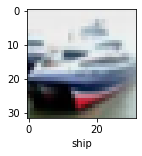

In [19]:
plot_sample(X_test,y_test,1 )

In [20]:
y_pred = cnn.predict(X_test)

In [21]:
np.argmax([y_pred[0]])

3

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

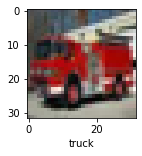

In [34]:
plot_sample(X_test, y_test,23)

In [33]:
classes[y_classes[23]]

'truck'

In [26]:
print ("classification Report: \n", classification_report(y_test, y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.75      0.72      1000
           1       0.78      0.78      0.78      1000
           2       0.58      0.55      0.56      1000
           3       0.45      0.52      0.48      1000
           4       0.72      0.52      0.60      1000
           5       0.56      0.57      0.57      1000
           6       0.75      0.75      0.75      1000
           7       0.71      0.73      0.72      1000
           8       0.84      0.74      0.79      1000
           9       0.69      0.80      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

